<a href="https://colab.research.google.com/github/sianakecilo/Pemograman_Python/blob/main/Pertemuan_11_Classification_Daun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Pertemuan 11

/content/drive/MyDrive/Pertemuan 11


In [3]:
ls

 clean/                              daun_test.jpg
'Copy of scenes_nn_4 layers.ipynb'  'Pertemuan 11_Classification Daun.ipynb'


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

In [98]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("clean")
data = []
labels = []

[INFO] loading images...


In [99]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	# image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	image = np.array(image) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [100]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [101]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(429, 224, 224, 3)
(144, 224, 224, 3)


In [148]:
model = Sequential()
model.add(Convolution2D(8, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(220, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 109, 109, 16)      1168      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 46656)             0         
_________________________________________________________________
dense_42 (Dense)             (None, 220)               10264540  
_________________________________________________________________
dense_43 (Dense)             (None, 5)               

In [149]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [150]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 60ms/step - loss: 3.5545 - accuracy: 0.2331 - val_loss: 1.5214 - val_accuracy: 0.3958
Epoch 2/25
14/14 [==============================] - 1s 42ms/step - loss: 1.4575 - accuracy: 0.4755 - val_loss: 1.3296 - val_accuracy: 0.5625
Epoch 3/25
14/14 [==============================] - 1s 40ms/step - loss: 1.1079 - accuracy: 0.6946 - val_loss: 0.9290 - val_accuracy: 0.6458
Epoch 4/25
14/14 [==============================] - 1s 41ms/step - loss: 0.6660 - accuracy: 0.8135 - val_loss: 0.6869 - val_accuracy: 0.7292
Epoch 5/25
14/14 [==============================] - 1s 40ms/step - loss: 0.3563 - accuracy: 0.8998 - val_loss: 0.5697 - val_accuracy: 0.7708
Epoch 6/25
14/14 [==============================] - 1s 43ms/step - loss: 0.2090 - accuracy: 0.9464 - val_loss: 0.5492 - val_accuracy: 0.7639
Epoch 7/25
14/14 [==============================] - 1s 41ms/step - loss: 0.1451 - accuracy: 0.9650 - val_loss: 0.4410 - val_accuracy: 0.8194
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


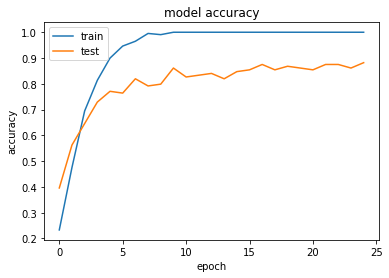

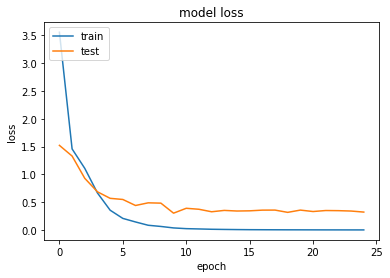

In [151]:
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [152]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.85      0.96      0.90        23
      GMB_04       0.65      0.89      0.76        19
      GMB_08       0.88      0.79      0.84        29
      GMB_09       1.00      0.91      0.95        44
      nonGMB       0.96      0.86      0.91        29

    accuracy                           0.88       144
   macro avg       0.87      0.88      0.87       144
weighted avg       0.90      0.88      0.89       144



In [111]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [121]:
image1='daun_test.jpg'

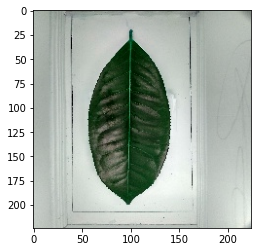

In [122]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [123]:
image_testing = Image.open(image1)
image_testing = np.array(image_testing.resize((224, 224))) / 255.0
image_testing.shape

(224, 224, 3)

In [124]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 224, 224, 3)


In [125]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[6.5950699e-05 2.0577784e-06 7.5911310e-05 9.9985588e-01 7.2765715e-08]]
['GMB_09']
